In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
brsf = pd.read_csv("BRS_final.csv")
brsf.Date = pd.to_datetime(brsf.Date)
brsf.set_index("Date",inplace=True)

max correlation is at lag 10


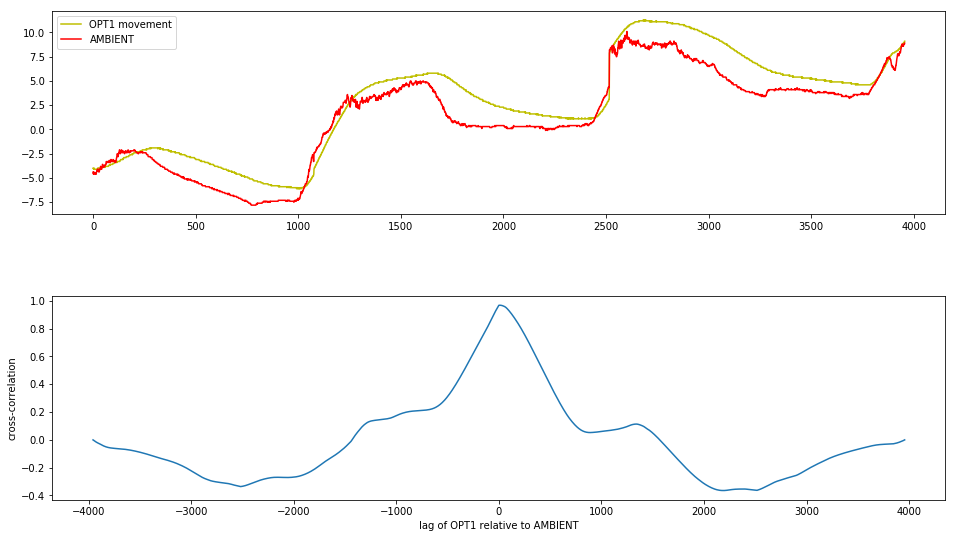

In [3]:
#not fully understood why this works.
npoints = 3957
X = np.arange(npoints)
Y1 = brsf.OPT_1.values #change accordingly
Y2 = brsf.AMBIENT.values

Lag = np.arange(-npoints + 1,npoints)
Ccov = np.correlate(Y1-Y1.mean(),Y2-Y2.mean(),mode="full")
Ccor = Ccov / (npoints * Y1.std() * Y2.std())

Fig ,Axs = plt.subplots(nrows=2,figsize=(16,9))
Fig.subplots_adjust(hspace=0.4)
Ax = Axs[0]

Ax.plot(X, Y1, 'y', label='OPT1 movement')
Ax.plot(X, Y2, 'r', label='AMBIENT')
Ax.legend()

Ax = Axs[1]
Ax.plot(Lag, Ccor)
Ax.set_ylabel('cross-correlation')
Ax.set_xlabel('lag of OPT1 relative to AMBIENT')

maxlag = Lag[np.argmax(Ccor)]
print("max correlation is at lag %d" % maxlag)